In [ ]:
#MODULE 1    DATA COLLECTION AND UNDERSTANDING FOR SMART ENERGY ANALYSIS
#PROJECT SCOPE:
#The Smart Energy Consumption Analysis and Prediction System aims to analyze device-level electricity
#usage in a smart home environment using machine learning and deep learning techniques. 
#The system collects timestamped energy readings from various home appliances, processes the data,
#identifies consumption patterns, and predicts future energy usage. It also provides interactive
#visualizations, smart suggestions, and a web-based dashboard for monitoring energy usage in real time.
#The project focuses on improving energy efficiency, reducing electricity costs, and supporting sustainable 
#usage behavior.

#FUNCTIONAL OBJECTIVES:
#Collect and clean smart home energy data
#Analyze device-wise consumption
#Predict future usage using ML & LSTM


In [2]:
#importing pandas and loading dataset

import pandas as pd
df=pd.read_csv("Smart Home Energy Consumption Optimization (1).csv")
df.head()


,home_id,timestamp,device_id,device_type,room,status,power_watt,user_present,activity,indoor_temp,outdoor_temp,humidity,light_level,day_of_week,hour_of_day,price_kWh
0,1,2022-01-01 00:00:00,air_conditioner1,air_conditioner,bedroom,off,0.00,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
1,1,2022-01-01 00:00:00,light1,light,living_room,on,105.88,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
2,1,2022-01-01 00:00:00,tv1,tv,living_room,off,0.00,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
3,1,2022-01-01 00:00:00,fridge1,fridge,kitchen,on,223.46,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
4,1,2022-01-01 00:00:00,washer1,washer,laundry_room,off,0.00,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500


In [3]:
#for checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752000 entries, 0 to 1751999
Data columns (total 16 columns):
 #   Column        Dtype  
---  ------        -----  
 0   home_id       int64  
 1   timestamp     object 
 2   device_id     object 
 3   device_type   object 
 4   room          object 
 5   status        object 
 6   power_watt    float64
 7   user_present  int64  
 8   activity      object 
 9   indoor_temp   float64
 10  outdoor_temp  float64
 11  humidity      float64
 12  light_level   float64
 13  day_of_week   int64  
 14  hour_of_day   int64  
 15  price_kWh     int64  
dtypes: float64(5), int64(5), object(6)
memory usage: 213.9+ MB


In [4]:
# df.isnull() checks each cell for missing values (True = missing, False = not missing)
df.isnull()

,home_id,timestamp,device_id,device_type,room,status,power_watt,user_present,activity,indoor_temp,outdoor_temp,humidity,light_level,day_of_week,hour_of_day,price_kWh
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1751995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1751996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1751997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1751998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
# df.isnull().sum() counts the total number of missing (null) values in each column
df.isnull().sum()

home_id         0
timestamp       0
device_id       0
device_type     0
room            0
status          0
power_watt      0
user_present    0
activity        0
indoor_temp     0
outdoor_temp    0
humidity        0
light_level     0
day_of_week     0
hour_of_day     0
price_kWh       0
dtype: int64

In [5]:
df.columns

Index(['home_id', 'timestamp', 'device_id', 'device_type', 'room', 'status',
       'power_watt', 'user_present', 'activity', 'indoor_temp', 'outdoor_temp',
       'humidity', 'light_level', 'day_of_week', 'hour_of_day', 'price_kWh'],
      dtype='object')

In [6]:
df.describe()

,home_id,power_watt,user_present,indoor_temp,outdoor_temp,humidity,light_level,day_of_week,hour_of_day,price_kWh
count,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06
mean,5.500000e+00,1.199867e+02,7.866553e-01,2.119561e+01,2.119547e+01,6.048777e+01,2.548263e+02,3.005479e+00,1.150000e+01,2.250000e+03
std,2.872282e+00,2.252036e+02,4.096692e-01,8.014708e+00,7.930646e+00,1.889061e+01,2.777288e+02,1.999993e+00,6.922189e+00,5.590172e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,2.200000e+00,4.000000e+00,2.370000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+03
25%,3.000000e+00,0.000000e+00,1.000000e+00,1.520000e+01,1.520000e+01,4.510000e+01,4.710000e+01,1.000000e+00,5.750000e+00,1.500000e+03
50%,5.500000e+00,0.000000e+00,1.000000e+00,2.030000e+01,2.030000e+01,5.940000e+01,9.240000e+01,3.000000e+00,1.150000e+01,2.500000e+03
75%,8.000000e+00,2.181600e+02,1.000000e+00,2.650000e+01,2.650000e+01,7.170000e+01,4.238000e+02,5.000000e+00,1.725000e+01,2.500000e+03
max,1.000000e+01,3.482295e+03,1.000000e+00,4.320000e+01,4.120000e+01,1.000000e+02,1.000000e+03,6.000000e+00,2.300000e+01,3.000000e+03


In [7]:
#to check duplicated values (sum--counts how many duplicate rows are present in the dataset)
df.duplicated().sum()

np.int64(0)

In [8]:
#remove duplicates if any
df=df.drop_duplicates()

In [9]:
df.describe(include='all')

,home_id,timestamp,device_id,device_type,room,status,power_watt,user_present,activity,indoor_temp,outdoor_temp,humidity,light_level,day_of_week,hour_of_day,price_kWh
count,1.752000e+06,1752000,1752000,1752000,1752000,1752000,1.752000e+06,1.752000e+06,1752000,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06
unique,NaN,35040,50,5,4,2,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2022-12-31 19:45:00,air_conditioner1,air_conditioner,living_room,off,NaN,NaN,sleeping,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,50,35040,350400,700800,1151365,NaN,NaN,582955,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.500000e+00,NaN,NaN,NaN,NaN,NaN,1.199867e+02,7.866553e-01,NaN,2.119561e+01,2.119547e+01,6.048777e+01,2.548263e+02,3.005479e+00,1.150000e+01,2.250000e+03
std,2.872282e+00,NaN,NaN,NaN,NaN,NaN,2.252036e+02,4.096692e-01,NaN,8.014708e+00,7.930646e+00,1.889061e+01,2.777288e+02,1.999993e+00,6.922189e+00,5.590172e+02
min,1.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,2.200000e+00,4.000000e+00,2.370000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+03
25%,3.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.000000e+00,NaN,1.520000e+01,1.520000e+01,4.510000e+01,4.710000e+01,1.000000e+00,5.750000e+00,1.500000e+03
50%,5.500000e+00,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.000000e+00,NaN,2.030000e+01,2.030000e+01,5.940000e+01,9.240000e+01,3.000000e+00,1.150000e+01,2.500000e+03
75%,8.000000e+00,NaN,NaN,NaN,NaN,NaN,2.181600e+02,1.000000e+00,NaN,2.650000e+01,2.650000e+01,7.170000e+01,4.238000e+02,5.000000e+00,1.725000e+01,2.500000e+03


In [10]:
#check shape(size of dataset(rows,columns))
df.shape


(1752000, 16)

In [11]:
df.columns

Index(['home_id', 'timestamp', 'device_id', 'device_type', 'room', 'status',
       'power_watt', 'user_present', 'activity', 'indoor_temp', 'outdoor_temp',
       'humidity', 'light_level', 'day_of_week', 'hour_of_day', 'price_kWh'],
      dtype='object')

In [12]:
df.dtypes

home_id           int64
timestamp        object
device_id        object
device_type      object
room             object
status           object
power_watt      float64
user_present      int64
activity         object
indoor_temp     float64
outdoor_temp    float64
humidity        float64
light_level     float64
day_of_week       int64
hour_of_day       int64
price_kWh         int64
dtype: object

In [13]:
#to see number of rows
df.shape[0]

1752000

In [14]:
#to see number of columns
df.shape[1]

16

In [15]:
#task4 finding outliers
#outlier=a value that is extremely high or low compared to other values


df.describe()

,home_id,power_watt,user_present,indoor_temp,outdoor_temp,humidity,light_level,day_of_week,hour_of_day,price_kWh
count,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06
mean,5.500000e+00,1.199867e+02,7.866553e-01,2.119561e+01,2.119547e+01,6.048777e+01,2.548263e+02,3.005479e+00,1.150000e+01,2.250000e+03
std,2.872282e+00,2.252036e+02,4.096692e-01,8.014708e+00,7.930646e+00,1.889061e+01,2.777288e+02,1.999993e+00,6.922189e+00,5.590172e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,2.200000e+00,4.000000e+00,2.370000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+03
25%,3.000000e+00,0.000000e+00,1.000000e+00,1.520000e+01,1.520000e+01,4.510000e+01,4.710000e+01,1.000000e+00,5.750000e+00,1.500000e+03
50%,5.500000e+00,0.000000e+00,1.000000e+00,2.030000e+01,2.030000e+01,5.940000e+01,9.240000e+01,3.000000e+00,1.150000e+01,2.500000e+03
75%,8.000000e+00,2.181600e+02,1.000000e+00,2.650000e+01,2.650000e+01,7.170000e+01,4.238000e+02,5.000000e+00,1.725000e+01,2.500000e+03
max,1.000000e+01,3.482295e+03,1.000000e+00,4.320000e+01,4.120000e+01,1.000000e+02,1.000000e+03,6.000000e+00,2.300000e+01,3.000000e+03


In [17]:
#select only numeric columns
numeric_cols=df.select_dtypes(include=['float64','int64']).columns
numeric_cols

Index(['home_id', 'power_watt', 'user_present', 'indoor_temp', 'outdoor_temp',
       'humidity', 'light_level', 'day_of_week', 'hour_of_day', 'price_kWh'],
      dtype='object')

In [18]:
#to check outliers using IQR method
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]

    print(f"{col} → Number of outliers: {outliers.shape[0]}")

home_id → Number of outliers: 0
power_watt → Number of outliers: 100821
user_present → Number of outliers: 373780
indoor_temp → Number of outliers: 0
outdoor_temp → Number of outliers: 0
humidity → Number of outliers: 0
light_level → Number of outliers: 6400
day_of_week → Number of outliers: 0
hour_of_day → Number of outliers: 0
price_kWh → Number of outliers: 0


In [19]:
#to remove outliers
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]

In [20]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]

    print(f"{col} → Number of outliers: {outliers.shape[0]}")

home_id → Number of outliers: 0
power_watt → Number of outliers: 1486
user_present → Number of outliers: 0
indoor_temp → Number of outliers: 15208
outdoor_temp → Number of outliers: 16647
humidity → Number of outliers: 0
light_level → Number of outliers: 95477
day_of_week → Number of outliers: 0
hour_of_day → Number of outliers: 0
price_kWh → Number of outliers: 0


In [40]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]

In [21]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]

    print(f"{col} → Number of outliers: {outliers.shape[0]}")

home_id → Number of outliers: 0
power_watt → Number of outliers: 1486
user_present → Number of outliers: 0
indoor_temp → Number of outliers: 15208
outdoor_temp → Number of outliers: 16647
humidity → Number of outliers: 0
light_level → Number of outliers: 95477
day_of_week → Number of outliers: 0
hour_of_day → Number of outliers: 0
price_kWh → Number of outliers: 0


In [22]:
#task5---summary statistics for all numeric columns
df.describe()

,home_id,power_watt,user_present,indoor_temp,outdoor_temp,humidity,light_level,day_of_week,hour_of_day,price_kWh
count,1.061436e+06,1.061436e+06,1061436.0,1.061436e+06,1.061436e+06,1.061436e+06,1.061436e+06,1.061436e+06,1.061436e+06,1.061436e+06
mean,5.418757e+00,8.151197e+01,1.0,1.802155e+01,1.802393e+01,6.186142e+01,7.675008e+01,3.085375e+00,1.104063e+01,2.084962e+03
std,2.894891e+00,1.240962e+02,0.0,6.566550e+00,6.471957e+00,1.879226e+01,7.488100e+01,2.017909e+00,8.397416e+00,6.450964e+02
min,1.000000e+00,0.000000e+00,1.0,2.200000e+00,4.000000e+00,2.490000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+03
25%,3.000000e+00,0.000000e+00,1.0,1.340000e+01,1.340000e+01,4.640000e+01,2.980000e+01,1.000000e+00,3.000000e+00,1.500000e+03
50%,5.000000e+00,0.000000e+00,1.0,1.740000e+01,1.740000e+01,6.090000e+01,5.930000e+01,3.000000e+00,7.000000e+00,1.500000e+03
75%,8.000000e+00,2.003700e+02,1.0,2.200000e+01,2.190000e+01,7.290000e+01,8.920000e+01,5.000000e+00,2.000000e+01,2.500000e+03
max,1.000000e+01,5.453693e+02,1.0,3.890000e+01,3.820000e+01,1.000000e+02,3.613000e+02,6.000000e+00,2.300000e+01,3.000000e+03


In [23]:
#summary statistics for categorical columns
df.describe(include='object')

,timestamp,device_id,device_type,room,status,activity
count,1061436,1061436,1061436,1061436,1061436,1061436
unique,24204,50,5,4,2,4
top,2022-01-01 04:00:00,light1,light,living_room,off,sleeping
freq,50,24112,224257,445917,712530,561781


In [24]:
#to check number of unique values in every column
df.nunique()

home_id            10
timestamp       24204
device_id          50
device_type         5
room                4
status              2
power_watt      37497
user_present        1
activity            4
indoor_temp       367
outdoor_temp      343
humidity          751
light_level      1887
day_of_week         7
hour_of_day        21
price_kWh           3
dtype: int64

In [25]:
df['room'].value_counts()

room
living_room     445917
kitchen         215769
laundry_room    203898
bedroom         195852
Name: count, dtype: int64

In [26]:
df['power_watt'].min()
df['power_watt'].max()

545.3693403109343

In [27]:
df['power_watt'].mean()
df['power_watt'].median()

0.0

In [28]:
df['power_watt'].describe()

count    1.061436e+06
mean     8.151197e+01
std      1.240962e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.003700e+02
max      5.453693e+02
Name: power_watt, dtype: float64

In [29]:
df.corr(numeric_only=True)

,home_id,power_watt,user_present,indoor_temp,outdoor_temp,humidity,light_level,day_of_week,hour_of_day,price_kWh
home_id,1.000000,-0.008889,NaN,0.000802,0.000668,-0.001235,-0.058091,0.014583,-0.010300,-0.014527
power_watt,-0.008889,1.000000,NaN,0.071347,0.072206,-0.012271,-0.037620,-0.013290,0.185155,0.176503
user_present,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
indoor_temp,0.000802,0.071347,NaN,1.000000,0.984402,-0.425378,0.197120,0.002684,0.262049,0.352646
outdoor_temp,0.000668,0.072206,NaN,0.984402,1.000000,-0.432352,0.200611,0.002540,0.265747,0.358012
humidity,-0.001235,-0.012271,NaN,-0.425378,-0.432352,1.000000,-0.025536,-0.003906,-0.032156,-0.040808
light_level,-0.058091,-0.037620,NaN,0.197120,0.200611,-0.025536,1.000000,0.093913,0.025040,0.285414
day_of_week,0.014583,-0.013290,NaN,0.002684,0.002540,-0.003906,0.093913,1.000000,0.008777,0.029465
hour_of_day,-0.010300,0.185155,NaN,0.262049,0.265747,-0.032156,0.025040,0.008777,1.000000,0.518819
price_kWh,-0.014527,0.176503,NaN,0.352646,0.358012,-0.040808,0.285414,0.029465,0.518819,1.000000


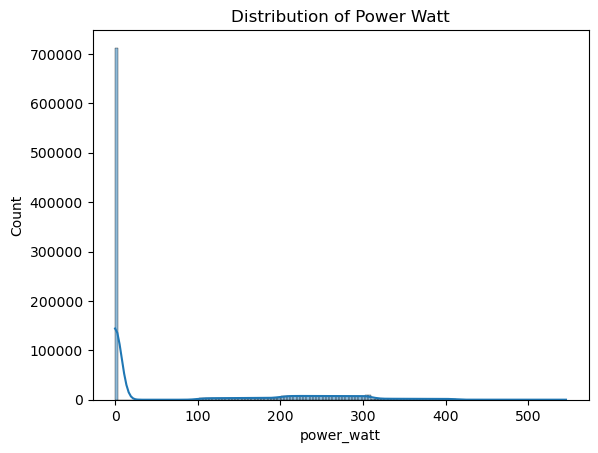

In [32]:
#histogram(distribution plot)shows how values of power_watt are distributed

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['power_watt'], kde=True)
plt.title("Distribution of Power Watt")
plt.show()

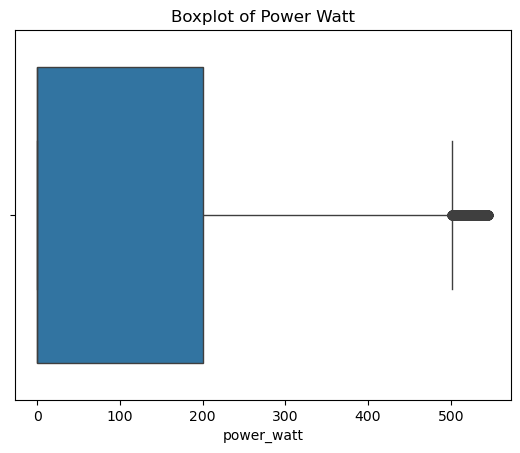

In [33]:
sns.boxplot(x=df['power_watt'])
plt.title("Boxplot of Power Watt")
plt.show()

In [34]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [35]:
df=df.sort_values(by=['timestamp','room','device_id'])

In [36]:
grouped = df.groupby(['room', 'device_id', 'device_type', 'timestamp']).sum()
grouped.head()

home_id status  \
room    device_id        device_type     timestamp                             
bedroom air_conditioner1 air_conditioner 2022-01-01 00:00:00        1    off   
                                         2022-01-01 00:15:00        1    off   
                                         2022-01-01 00:30:00        1    off   
                                         2022-01-01 00:45:00        1    off   
                                         2022-01-01 01:15:00        1    off   

                                                              power_watt  \
room    device_id        device_type     timestamp                         
bedroom air_conditioner1 air_conditioner 2022-01-01 00:00:00         0.0   
                                         2022-01-01 00:15:00         0.0   
                                         2022-01-01 00:30:00         0.0   
                                         2022-01-01 00:45:00         0.0   
                                         2022-01-01 01:15:00         0.0   

                                                              user_present  \
room    device_id        device_type     timestamp                           
bedroom air_conditioner1 air_conditioner 2022-01-01 00:00:00             1   
                                         2022-01-01 00:15:00             1   
                                         2022-01-01 00:30:00             1   
                                         2022-01-01 00:45:00             1   
                                         2022-01-01 01:15:00             1   

                                                              activity  \
room    device_id        device_type     timestamp                       
bedroom air_conditioner1 air_conditioner 2022-01-01 00:00:00  sleeping   
                                         2022-01-01 00:15:00  sleeping   
                                         2022-01-01 00:30:00  sleeping   
                                         2022-01-01 00:45:00  sleeping   
                                         2022-01-01 01:15:00  sleeping   

                                                              indoor_temp  \
room    device_id        device_type     timestamp                          
bedroom air_conditioner1 air_conditioner 2022-01-01 00:00:00         11.4   
                                         2022-01-01 00:15:00         11.0   
                                         2022-01-01 00:30:00         10.2   
                                         2022-01-01 00:45:00         12.0   
                                         2022-01-01 01:15:00         12.8   

                                                              outdoor_temp  \
room    device_id        device_type     timestamp                           
bedroom air_conditioner1 air_conditioner 2022-01-01 00:00:00          11.9   
                                         2022-01-01 00:15:00          11.7   
                                         2022-01-01 00:30:00          11.6   
                                         2022-01-01 00:45:00          11.7   
                                         2022-01-01 01:15:00          11.6   

                                                              humidity  \
room    device_id        device_type     timestamp                       
bedroom air_conditioner1 air_conditioner 2022-01-01 00:00:00      45.2   
                                         2022-01-01 00:15:00      39.6   
                                         2022-01-01 00:30:00      58.6   
                                         2022-01-01 00:45:00      69.9   
                                         2022-01-01 01:15:00      37.5   

                                                              light_level  \
room    device_id        device_type     timestamp                          
bedroom air_conditioner1 air_conditioner 2022-01-01 00:00:00         73.4   
                                         2022-01-01 00:15:00     

In [37]:
df['timestamp']=pd.to_datetime(df['timestamp'])


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 947566 entries, 0 to 1751992
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   home_id       947566 non-null  int64         
 1   timestamp     947566 non-null  datetime64[ns]
 2   device_id     947566 non-null  object        
 3   device_type   947566 non-null  object        
 4   room          947566 non-null  object        
 5   status        947566 non-null  object        
 6   power_watt    947566 non-null  float64       
 7   user_present  947566 non-null  int64         
 8   activity      947566 non-null  object        
 9   indoor_temp   947566 non-null  float64       
 10  outdoor_temp  947566 non-null  float64       
 11  humidity      947566 non-null  float64       
 12  light_level   947566 non-null  float64       
 13  day_of_week   947566 non-null  int64         
 14  hour_of_day   947566 non-null  int64         
 15  price_kWh     947566 

In [38]:
df['timestamp'].head()

0    2022-01-01
45   2022-01-01
5    2022-01-01
10   2022-01-01
15   2022-01-01
Name: timestamp, dtype: datetime64[ns]

In [39]:
#sorting the dataset by timestamp
df=df.sort_values(by='timestamp')

In [40]:
#finding min and max timestamp
df['timestamp'].min(),df['timestamp'].max()

(Timestamp('2022-01-01 00:00:00'), Timestamp('2022-12-31 23:45:00'))

In [41]:
# Creating a full timestamp range with 15-minute intervals (change if needed)
full_range = pd.date_range(start=df['timestamp'].min(),
                           end=df['timestamp'].max(),
                           freq='15min')

In [42]:
#checking missing timestamps
missing_timestamps = len(full_range) - df['timestamp'].nunique()
missing_timestamps

10836

In [43]:
#perform exploratory data analysis
#check dataset shape(number of rows and columns are in the dataset)
df.shape

(1061436, 16)

In [44]:
#summary statistics for numeric columns(df.describe() shows count,mean,min,max,std deviation) 
df.describe()

,home_id,timestamp,power_watt,user_present,indoor_temp,outdoor_temp,humidity,light_level,day_of_week,hour_of_day,price_kWh
count,1.061436e+06,1061436,1.061436e+06,1061436.0,1.061436e+06,1.061436e+06,1.061436e+06,1.061436e+06,1.061436e+06,1.061436e+06,1.061436e+06
mean,5.418757e+00,2022-07-01 13:56:07.891140096,8.151197e+01,1.0,1.802155e+01,1.802393e+01,6.186142e+01,7.675008e+01,3.085375e+00,1.104063e+01,2.084962e+03
min,1.000000e+00,2022-01-01 00:00:00,0.000000e+00,1.0,2.200000e+00,4.000000e+00,2.490000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+03
25%,3.000000e+00,2022-03-23 19:30:00,0.000000e+00,1.0,1.340000e+01,1.340000e+01,4.640000e+01,2.980000e+01,1.000000e+00,3.000000e+00,1.500000e+03
50%,5.000000e+00,2022-06-29 23:15:00,0.000000e+00,1.0,1.740000e+01,1.740000e+01,6.090000e+01,5.930000e+01,3.000000e+00,7.000000e+00,1.500000e+03
75%,8.000000e+00,2022-10-09 21:45:00,2.003700e+02,1.0,2.200000e+01,2.190000e+01,7.290000e+01,8.920000e+01,5.000000e+00,2.000000e+01,2.500000e+03
max,1.000000e+01,2022-12-31 23:45:00,5.453693e+02,1.0,3.890000e+01,3.820000e+01,1.000000e+02,3.613000e+02,6.000000e+00,2.300000e+01,3.000000e+03
std,2.894891e+00,NaN,1.240962e+02,0.0,6.566550e+00,6.471957e+00,1.879226e+01,7.488100e+01,2.017909e+00,8.397416e+00,6.450964e+02


In [45]:
#shows all unique device types in the dataset
df['device_type'].unique()

array(['air_conditioner', 'washer', 'light', 'tv', 'fridge'], dtype=object)

In [47]:
#shows all unique room in the dataset
df['room'].unique()

array(['bedroom', 'laundry_room', 'living_room', 'kitchen'], dtype=object)

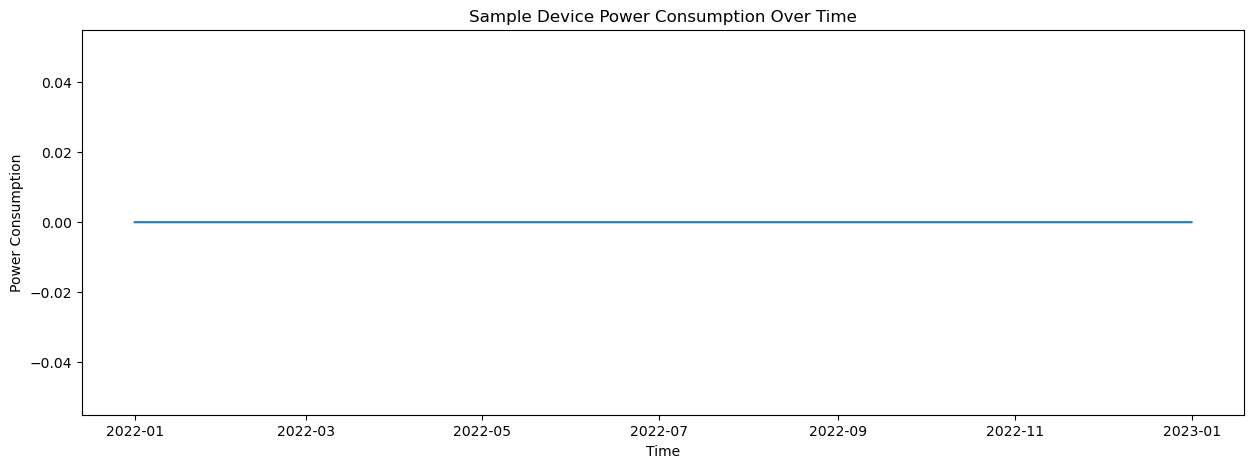

In [48]:
# Line plot of power over time for a sample device.
# Uses attributes: timestamp (x-axis) and power (y-axis).
# Helps see how a device's energy consumption changes over time.
import matplotlib.pyplot as plt

# Select one sample device
sample_device = df[df['device_type'] == df['device_type'].unique()[0]]

plt.figure(figsize=(15,5))
plt.plot(sample_device['timestamp'], sample_device['power_watt'])
plt.xlabel("Time")
plt.ylabel("Power Consumption")
plt.title("Sample Device Power Consumption Over Time")
plt.show()

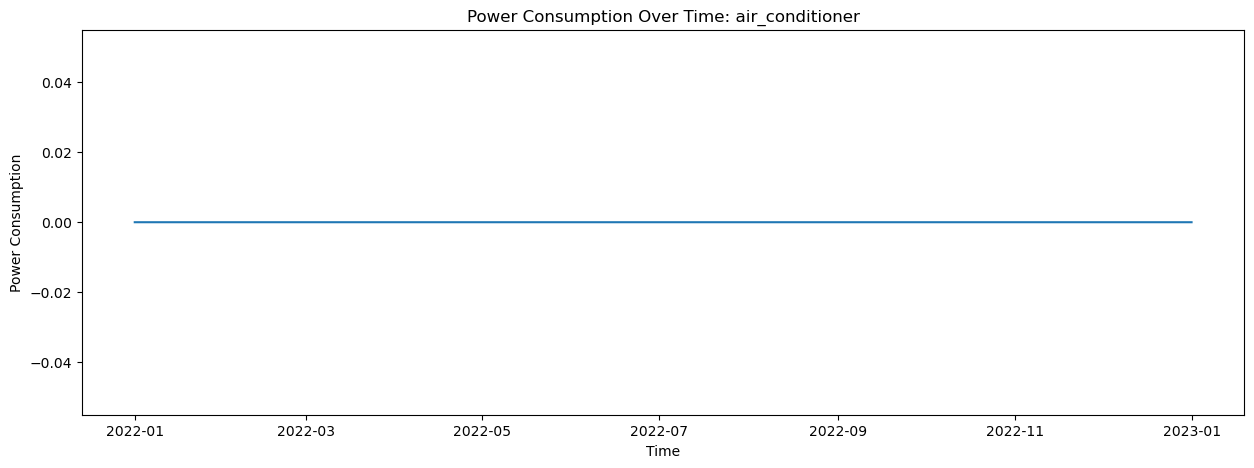

In [49]:


import matplotlib.pyplot as plt

# Select one sample device
sample_device = df[df['device_type'] == df['device_type'].unique()[0]]

plt.figure(figsize=(15,5))
plt.plot(sample_device['timestamp'], sample_device['power_watt'])
plt.xlabel("Time")
plt.ylabel("Power Consumption")
plt.title(f"Power Consumption Over Time: {df['device_type'].unique()[0]}")
plt.show()

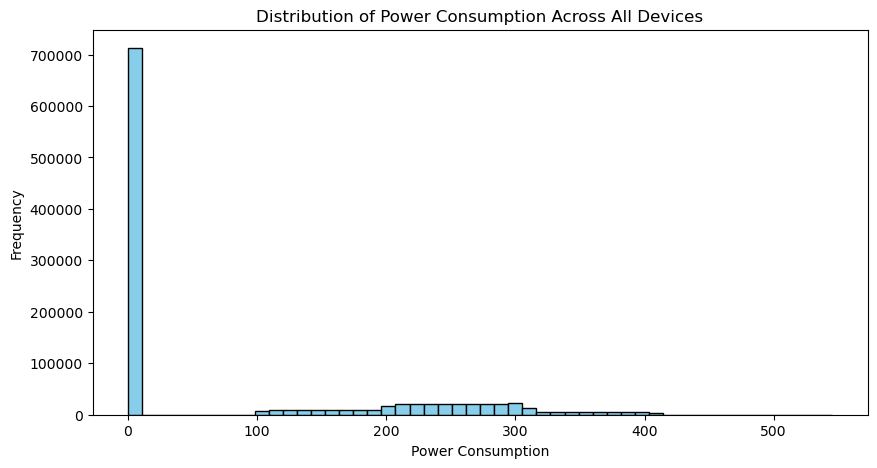

In [50]:
# Histogram of power_watt values.
# Uses the 'power_watt' attribute to show distribution of energy consumption.
# Helps understand how many readings fall into low, medium, or high usage.

plt.figure(figsize=(10,5))
plt.hist(df['power_watt'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel("Power Consumption")
plt.ylabel("Frequency")
plt.title("Distribution of Power Consumption Across All Devices")
plt.show()

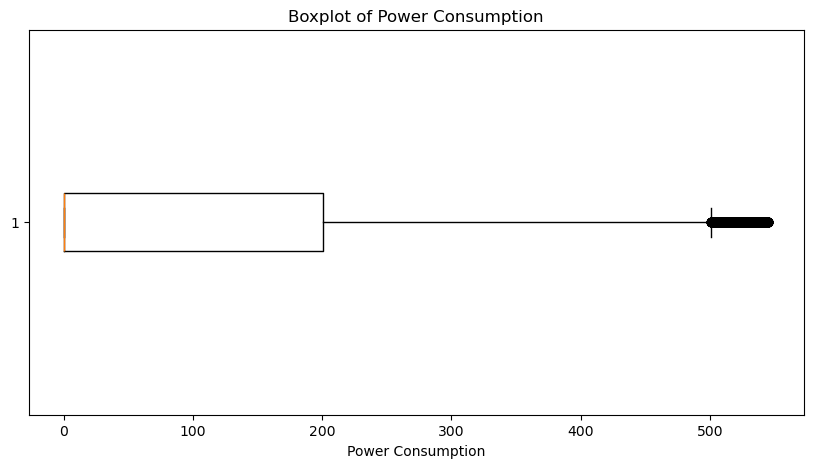

In [51]:
#Boxplot of power values.
# Uses the single attribute 'power_watt' to identify outliers and extremes.
# Helps detect abnormal spikes in energy usage.

plt.figure(figsize=(10,5))
plt.boxplot(df['power_watt'], vert=False)
plt.xlabel("Power Consumption")
plt.title("Boxplot of Power Consumption")
plt.show()

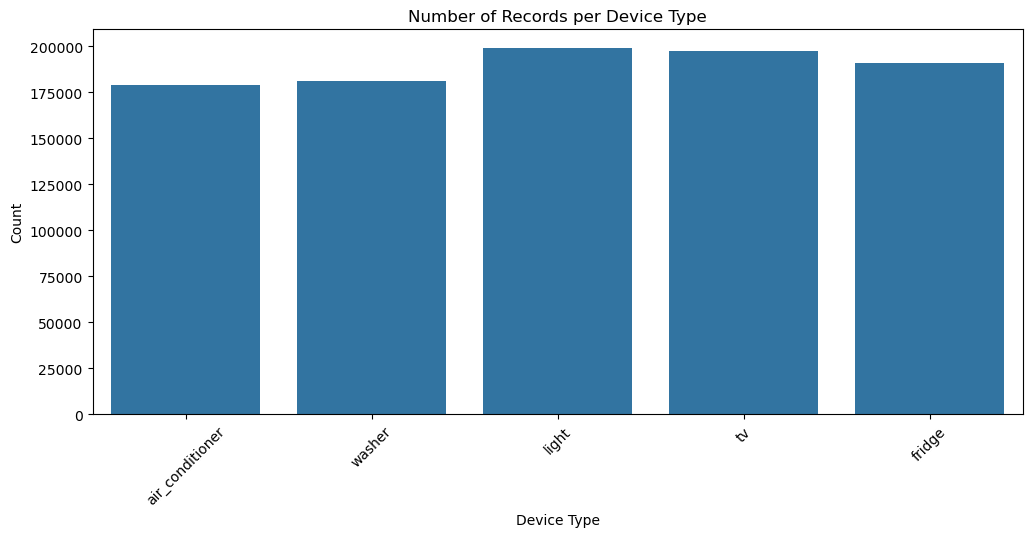

In [71]:
# Countplot of device types.
# Uses the 'device_type' attribute to show how many readings belong to each device.
# Helps identify the most frequently used devices in the dataset.


import seaborn as sns

plt.figure(figsize=(12,5))
sns.countplot(x='device_type', data=df)
plt.xticks(rotation=45)
plt.xlabel("Device Type")
plt.ylabel("Count")
plt.title("Number of Records per Device Type")
plt.show()

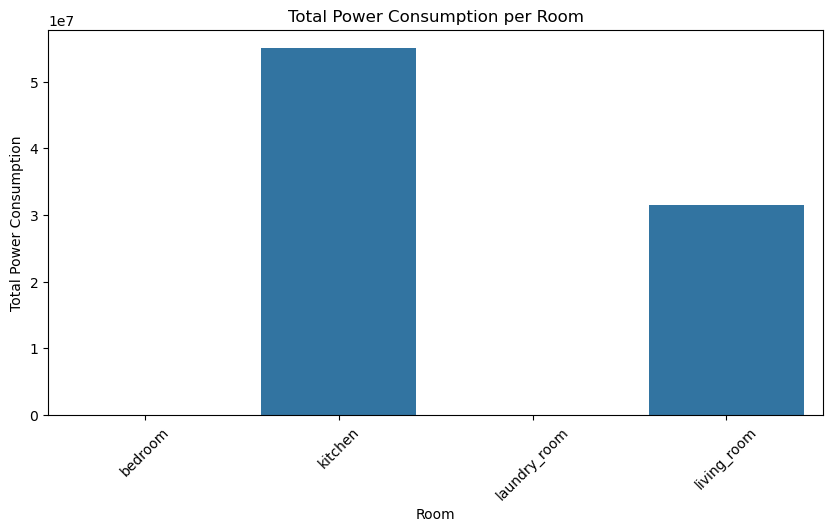

In [52]:
# Bar chart: Total power consumption by each room.
# Uses attributes: 'room' (grouping) and 'power' (sum of energy used).
# Helps understand which room consumes the most electricity.


room_power = df.groupby('room')['power_watt'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='room', y='power_watt', data=room_power)
plt.xticks(rotation=45)
plt.xlabel("Room")
plt.ylabel("Total Power Consumption")
plt.title("Total Power Consumption per Room")
plt.show()

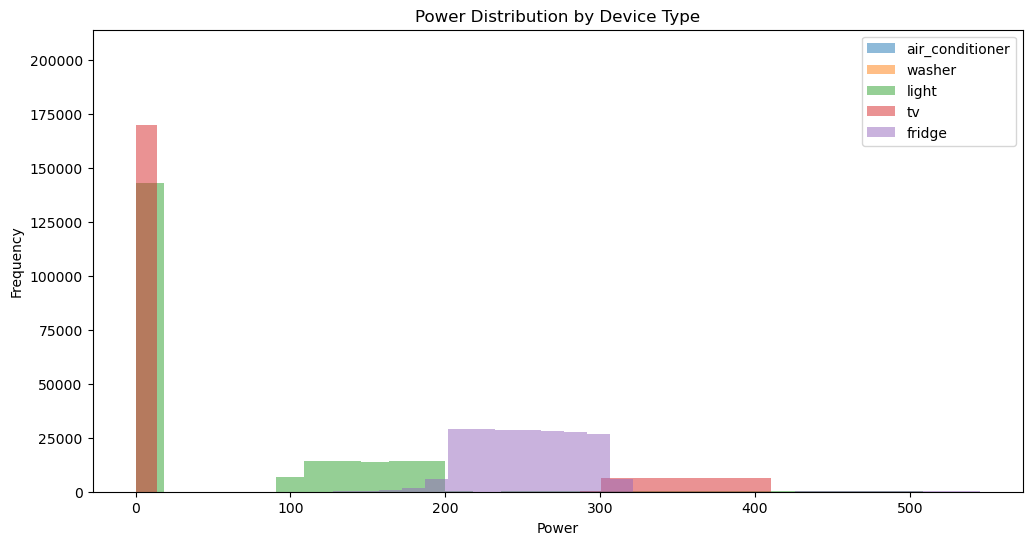

In [53]:
# Bar chart: Total power consumption by device type.
# Uses attributes: 'device_type' (grouping) and 'power' (sum of energy used).
# Helps identify which type of device is using the most electricity.

plt.figure(figsize=(12,6))
for device in df['device_type'].unique():
    subset = df[df['device_type'] == device]
    plt.hist(subset['power_watt'], bins=30, alpha=0.5, label=device)
plt.xlabel("Power")
plt.ylabel("Frequency")
plt.title("Power Distribution by Device Type")
plt.legend()
plt.show()

In [54]:
# Converting timestamp column to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [55]:
# Extracting useful time-based features
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month
df['weekday'] = df['timestamp'].dt.weekday

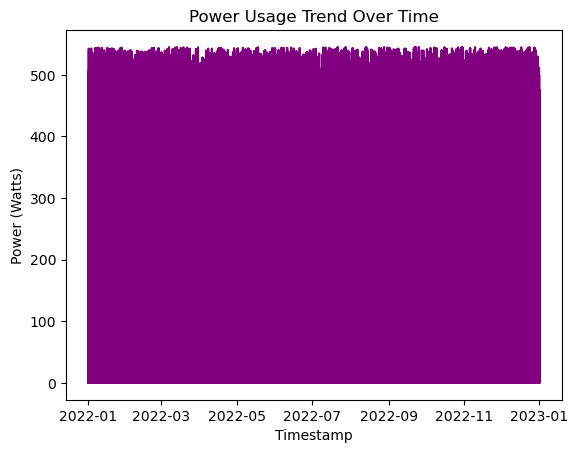

In [56]:
# Sorting by timestamp before plotting line graph
df_sorted = df.sort_values(by='timestamp')

# Line plot of power usage over time
plt.plot(df_sorted['timestamp'], df_sorted['power_watt'], color='purple')
plt.title("Power Usage Trend Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Power (Watts)")
plt.show()

C:\Users\manas\AppData\Local\Temp\ipykernel_25696\3643629954.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=home_power['home_id'],


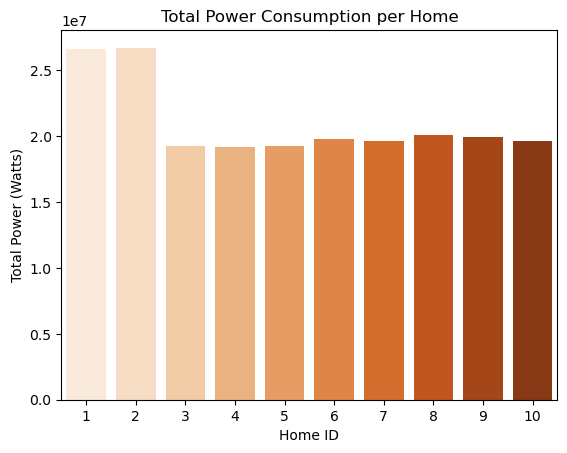

In [45]:
# Sum of power used in each home
home_power = df.groupby('home_id', as_index=False)[['power_watt']].sum()

# Plotting home vs total power consumption using explicit column names
sns.barplot(x=home_power['home_id'], 
            y=home_power['power_watt'], 
            palette='Oranges')

plt.title("Total Power Consumption per Home")
plt.xlabel("Home ID")
plt.ylabel("Total Power (Watts)")
plt.show()

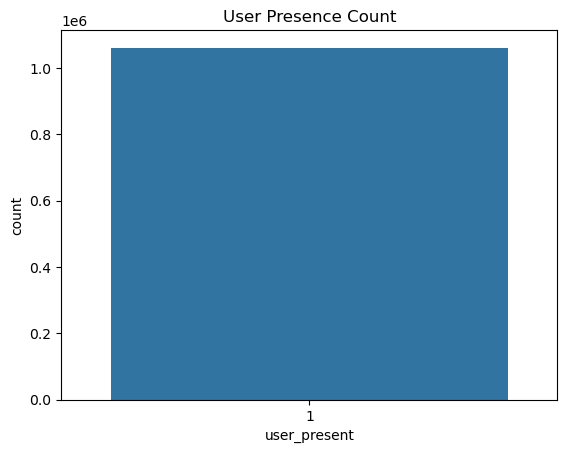

user_present
1    81.511972
Name: power_watt, dtype: float64

In [57]:
# Count of user_present true/false
sns.countplot(data=df, x='user_present')
plt.title("User Presence Count")
plt.show()

# Average power when user present vs not present
df.groupby('user_present')['power_watt'].mean()

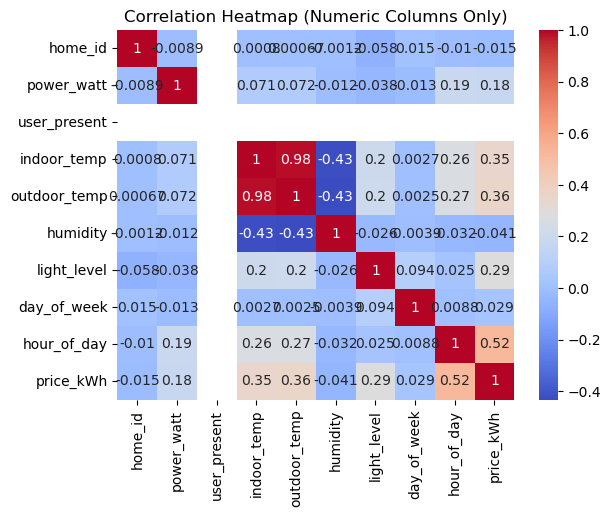

In [58]:
# Selecting only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculating correlation matrix
corr = numeric_df.corr()

# Plotting heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()

In [59]:
# Organizing the dataset in chronological order
# Sorting dataset by timestamp to maintain chronological order.
# This ensures all time-series analysis works correctly.

df = df.sort_values(by='timestamp')

In [60]:
# Group energy readings for each device by time
# Helps analyze energy usage pattern of each device over time.

device_readings = df.groupby(['device_id', 'timestamp'])['power_watt'].sum().reset_index()
print(device_readings)

                device_id           timestamp  power_watt
0        air_conditioner1 2022-01-01 00:00:00         0.0
1        air_conditioner1 2022-01-01 00:15:00         0.0
2        air_conditioner1 2022-01-01 00:30:00         0.0
3        air_conditioner1 2022-01-01 00:45:00         0.0
4        air_conditioner1 2022-01-01 01:15:00         0.0
...                   ...                 ...         ...
1061431           washer9 2022-12-31 21:45:00         0.0
1061432           washer9 2022-12-31 23:00:00         0.0
1061433           washer9 2022-12-31 23:15:00         0.0
1061434           washer9 2022-12-31 23:30:00         0.0
1061435           washer9 2022-12-31 23:45:00         0.0

[1061436 rows x 3 columns]


In [61]:
# Total energy used in each room at each timestamp
# Helps understand which rooms consume the most energy and when.

room_readings = df.groupby(['room', 'timestamp'])['power_watt'].sum().reset_index()
room_readings.head()
print(room_readings)

              room           timestamp  power_watt
0          bedroom 2022-01-01 00:00:00        0.00
1          bedroom 2022-01-01 00:15:00        0.00
2          bedroom 2022-01-01 00:30:00        0.00
3          bedroom 2022-01-01 00:45:00        0.00
4          bedroom 2022-01-01 01:00:00        0.00
...            ...                 ...         ...
96425  living_room 2022-12-31 22:45:00     1358.03
96426  living_room 2022-12-31 23:00:00      519.56
96427  living_room 2022-12-31 23:15:00        0.00
96428  living_room 2022-12-31 23:30:00        0.00
96429  living_room 2022-12-31 23:45:00      130.65

[96430 rows x 3 columns]


In [62]:
# Combined view: which device in which room used what power at what time
# Provides a detailed structure for device-level insights within rooms.

device_room_readings = df.groupby(['room', 'device_type', 'timestamp'])['power_watt'].sum().reset_index()
print(device_room_readings)

               room      device_type           timestamp  power_watt
0           bedroom  air_conditioner 2022-01-01 00:00:00        0.00
1           bedroom  air_conditioner 2022-01-01 00:15:00        0.00
2           bedroom  air_conditioner 2022-01-01 00:30:00        0.00
3           bedroom  air_conditioner 2022-01-01 00:45:00        0.00
4           bedroom  air_conditioner 2022-01-01 01:00:00        0.00
...             ...              ...                 ...         ...
120629  living_room               tv 2022-12-31 22:45:00      747.51
120630  living_room               tv 2022-12-31 23:00:00      335.50
120631  living_room               tv 2022-12-31 23:15:00        0.00
120632  living_room               tv 2022-12-31 23:30:00        0.00
120633  living_room               tv 2022-12-31 23:45:00        0.00

[120634 rows x 4 columns]


In [63]:
df.info

<bound method DataFrame.info of          home_id           timestamp          device_id      device_type  \
0              1 2022-01-01 00:00:00   air_conditioner1  air_conditioner   
19             4 2022-01-01 00:00:00            washer4           washer   
45            10 2022-01-01 00:00:00  air_conditioner10  air_conditioner   
5              2 2022-01-01 00:00:00   air_conditioner2  air_conditioner   
10             3 2022-01-01 00:00:00   air_conditioner3  air_conditioner   
...          ...                 ...                ...              ...   
1751977        6 2022-12-31 23:45:00                tv6               tv   
1751979        6 2022-12-31 23:45:00            washer6           washer   
1751981        7 2022-12-31 23:45:00             light7            light   
1751982        7 2022-12-31 23:45:00                tv7               tv   
1751992        9 2022-12-31 23:45:00                tv9               tv   

                 room status  power_watt  user_present 

In [6]:
# Check missing values
df.isnull().sum()

home_id         0
timestamp       0
device_id       0
device_type     0
room            0
status          0
power_watt      0
user_present    0
activity        0
indoor_temp     0
outdoor_temp    0
humidity        0
light_level     0
day_of_week     0
hour_of_day     0
price_kWh       0
dtype: int64

In [64]:
# Remove rows where timestamp or power_watt is missing
df = df.dropna(subset=['timestamp', 'power_watt'])

# Fill categorical missing values with "Unknown"
categorical_cols = ['device_type', 'room', 'status', 'activity']
for col in categorical_cols:
    df[col] = df[col].fillna('Unknown')

# Fill numeric missing values with median
numeric_cols = ['indoor_temp', 'outdoor_temp', 'humidity', 'light_level', 'price_kWh']
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

In [65]:
Q1 = df['power_watt'].quantile(0.25)
Q3 = df['power_watt'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df = df[(df['power_watt'] >= lower_limit) & (df['power_watt'] <= upper_limit)]

In [66]:
# -----------------------------
# MODULE 2: DATA CLEANING AND PREPROCESSING
# -----------------------------

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# -----------------------------
# 1. Load Dataset
# -----------------------------
df=pd.read_csv("Smart Home Energy Consumption Optimization (1).csv") 
# change filename
#df=pd.read_csv("Smart Home Energy Consumption Optimization (1).csv")

# Display first rows
df.head()

,home_id,timestamp,device_id,device_type,room,status,power_watt,user_present,activity,indoor_temp,outdoor_temp,humidity,light_level,day_of_week,hour_of_day,price_kWh
0,1,2022-01-01 00:00:00,air_conditioner1,air_conditioner,bedroom,off,0.00,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
1,1,2022-01-01 00:00:00,light1,light,living_room,on,105.88,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
2,1,2022-01-01 00:00:00,tv1,tv,living_room,off,0.00,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
3,1,2022-01-01 00:00:00,fridge1,fridge,kitchen,on,223.46,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
4,1,2022-01-01 00:00:00,washer1,washer,laundry_room,off,0.00,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500


In [4]:
# Check missing values 
df.isnull().sum()



home_id         0
timestamp       0
device_id       0
device_type     0
room            0
status          0
power_watt      0
user_present    0
activity        0
indoor_temp     0
outdoor_temp    0
humidity        0
light_level     0
day_of_week     0
hour_of_day     0
price_kWh       0
dtype: int64

In [67]:
# Fill numeric missing values with median
df = df.fillna(df.median(numeric_only=True))



In [68]:
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols].isnull().sum()

timestamp      0
device_id      0
device_type    0
room           0
status         0
activity       0
dtype: int64

In [69]:
# Fill categorical missing values with "Unknown"
df = df.fillna('Unknown') 

In [70]:
#Handle Outliers using IQR(numeric columns)

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df = df[(df[col] >= lower) & (df[col] <= upper)]

In [71]:
#Convert Timestamp to datetime & set index

df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df = df.dropna(subset=['timestamp'])  # remove invalid timestamps
df = df.set_index('timestamp')

In [12]:
df.head()

,home_id,timestamp,device_id,device_type,room,status,power_watt,user_present,activity,indoor_temp,outdoor_temp,humidity,light_level,day_of_week,hour_of_day,price_kWh
0,1,2022-01-01 00:00:00,air_conditioner1,air_conditioner,bedroom,off,0.00,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
1,1,2022-01-01 00:00:00,light1,light,living_room,on,105.88,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
2,1,2022-01-01 00:00:00,tv1,tv,living_room,off,0.00,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
3,1,2022-01-01 00:00:00,fridge1,fridge,kitchen,on,223.46,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
4,1,2022-01-01 00:00:00,washer1,washer,laundry_room,off,0.00,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500


In [73]:
df.index

DatetimeIndex(['2022-01-01 00:00:00', '2022-01-01 00:00:00',
               '2022-01-01 00:00:00', '2022-01-01 00:00:00',
               '2022-01-01 00:00:00', '2022-01-01 00:00:00',
               '2022-01-01 00:00:00', '2022-01-01 00:00:00',
               '2022-01-01 00:00:00', '2022-01-01 00:00:00',
               ...
               '2022-12-31 23:45:00', '2022-12-31 23:45:00',
               '2022-12-31 23:45:00', '2022-12-31 23:45:00',
               '2022-12-31 23:45:00', '2022-12-31 23:45:00',
               '2022-12-31 23:45:00', '2022-12-31 23:45:00',
               '2022-12-31 23:45:00', '2022-12-31 23:45:00'],
              dtype='datetime64[ns]', name='timestamp', length=1061436, freq=None)

In [74]:
df.dtypes

home_id           int64
device_id        object
device_type      object
room             object
status           object
power_watt      float64
user_present      int64
activity         object
indoor_temp     float64
outdoor_temp    float64
humidity        float64
light_level     float64
day_of_week       int64
hour_of_day       int64
price_kWh         int64
dtype: object

In [72]:
#Select only numerical columns for resampling

numeric_df = df.select_dtypes(include=['float64', 'int64'])

In [76]:
df.index

DatetimeIndex(['2022-01-01 00:00:00', '2022-01-01 00:00:00',
               '2022-01-01 00:00:00', '2022-01-01 00:00:00',
               '2022-01-01 00:00:00', '2022-01-01 00:00:00',
               '2022-01-01 00:00:00', '2022-01-01 00:00:00',
               '2022-01-01 00:00:00', '2022-01-01 00:00:00',
               ...
               '2022-12-31 23:45:00', '2022-12-31 23:45:00',
               '2022-12-31 23:45:00', '2022-12-31 23:45:00',
               '2022-12-31 23:45:00', '2022-12-31 23:45:00',
               '2022-12-31 23:45:00', '2022-12-31 23:45:00',
               '2022-12-31 23:45:00', '2022-12-31 23:45:00'],
              dtype='datetime64[ns]', name='timestamp', length=1061436, freq=None)

In [19]:
df.dtypes

home_id           int64
device_id        object
device_type      object
room             object
status           object
power_watt      float64
user_present      int64
activity         object
indoor_temp     float64
outdoor_temp    float64
humidity        float64
light_level     float64
day_of_week       int64
hour_of_day       int64
price_kWh         int64
dtype: object

In [83]:
#Resample(hourly and daily)

df_hourly = numeric_df.resample('h').mean()
df_daily = numeric_df.resample('D').mean()


In [78]:
df_hourly.head()

,home_id,power_watt,user_present,indoor_temp,outdoor_temp,humidity,light_level,day_of_week,hour_of_day,price_kWh
timestamp,,,,,,,,,,
2022-01-01 00:00:00,5.527919,54.861320,1.0,9.327919,9.414213,63.042132,43.283249,5.0,0.0,1500.0
2022-01-01 01:00:00,5.541667,51.579115,1.0,8.142188,8.347396,72.089583,43.889583,5.0,1.0,1500.0
2022-01-01 02:00:00,5.446154,57.646504,1.0,9.371282,9.195897,66.840000,55.292308,5.0,2.0,1500.0
2022-01-01 03:00:00,5.456410,51.101590,1.0,10.749744,10.958462,61.559487,47.458462,5.0,3.0,1500.0
2022-01-01 04:00:00,5.512821,57.850164,1.0,10.922051,11.036410,66.327179,51.762051,5.0,4.0,1500.0


In [79]:
#Normalize/Scale values
#Normalize all numerical features to a 0–1 range using MinMaxScale

scaler = MinMaxScaler()

df_hourly_scaled = pd.DataFrame(
    scaler.fit_transform(df_hourly),
    columns=df_hourly.columns,
    index=df_hourly.index
)

In [84]:
df_hourly_scaled.head()

,home_id,power_watt,user_present,indoor_temp,outdoor_temp,humidity,light_level,day_of_week,hour_of_day,price_kWh
timestamp,,,,,,,,,,
2022-01-01 00:00:00,0.804772,0.062683,0.0,0.042466,0.044101,0.500899,0.119799,0.833333,0.000000,0.0
2022-01-01 01:00:00,0.807482,0.038925,0.0,0.000000,0.006321,0.736757,0.121477,0.833333,0.043478,0.0
2022-01-01 02:00:00,0.788658,0.082844,0.0,0.044019,0.036370,0.599906,0.153037,0.833333,0.086957,0.0
2022-01-01 03:00:00,0.790679,0.035468,0.0,0.093387,0.098789,0.462248,0.131355,0.833333,0.130435,0.0
2022-01-01 04:00:00,0.801797,0.084318,0.0,0.099558,0.101549,0.586537,0.143266,0.833333,0.173913,0.0


In [85]:
df_hourly_scaled.describe()
#you will see min close to 0 and max close to 1

,home_id,power_watt,user_present,indoor_temp,outdoor_temp,humidity,light_level,day_of_week,hour_of_day,price_kWh
count,6051.000000,6051.000000,6051.0,6051.000000,6051.000000,6051.000000,6051.000000,6051.000000,6051.000000,6051.000000
mean,0.749603,0.266830,0.0,0.363700,0.358810,0.468988,0.248383,0.501460,0.491015,0.422354
std,0.168197,0.251565,0.0,0.213128,0.210911,0.103102,0.234986,0.333516,0.354583,0.424987
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.785496,0.078544,0.0,0.204658,0.201154,0.402694,0.132410,0.166667,0.173913,0.000000
50%,0.795733,0.136799,0.0,0.335541,0.331110,0.470122,0.143774,0.500000,0.347826,0.666667
75%,0.803334,0.394030,0.0,0.469967,0.463618,0.538682,0.167728,0.833333,0.826087,0.666667
max,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
#Train-Validation-Test Split

train, temp = train_test_split(df_hourly_scaled, test_size=0.2, shuffle=False)
val, test = train_test_split(temp, test_size=0.5, shuffle=False)

train.shape, val.shape, test.shape

((7008, 10), (876, 10), (876, 10))

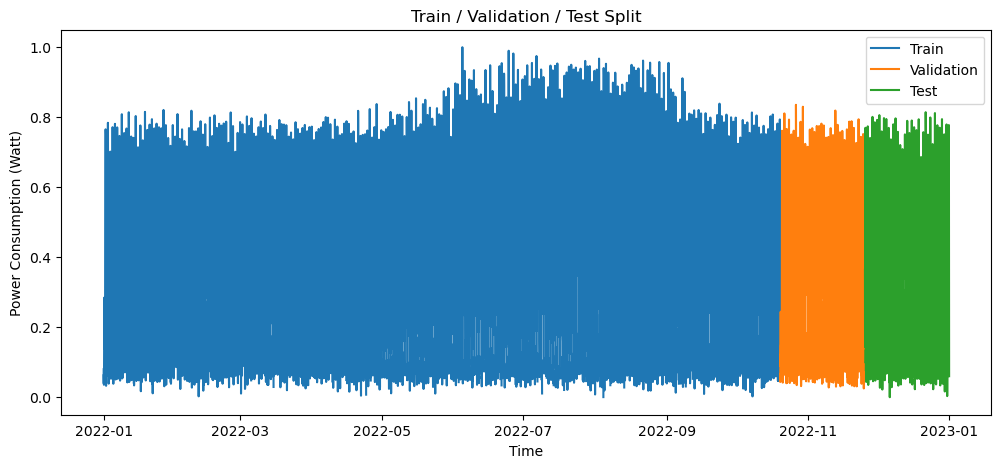

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Plot Train
plt.plot(train.index, train['power_watt'], label='Train')

# Plot Validation
plt.plot(val.index, val['power_watt'], label='Validation')

# Plot Test
plt.plot(test.index, test['power_watt'], label='Test')

plt.xlabel("Time")
plt.ylabel("Power Consumption (Watt)")
plt.title("Train / Validation / Test Split")
plt.legend()
plt.show()